In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.activations import softmax, relu, linear, sigmoid
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from matplotlib.gridspec import GridSpec
from matplotlib.widgets import Slider
tf.autograph.set_verbosity(0)
np.set_printoptions(precision=3)

import warnings
warnings.filterwarnings(action="ignore", category=FutureWarning)

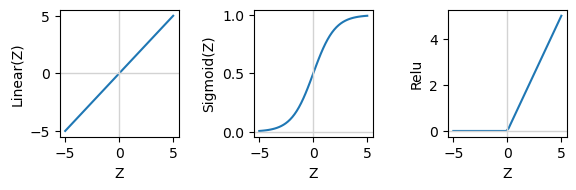

In [2]:
#plotting the 3 activation functions linear, sigmoid, relu
def plt_act_trio():
    fig, ax = plt.subplots(1, 3, figsize=(6, 2))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    
    z = np.linspace(-5, 5, 50)
    ax[0].plot(z, tf.keras.activations.linear(z))
    ax[0].axvline(0, color="lightgray", lw=1)
    ax[0].axhline(0, color="lightgray", lw=1)
    ax[0].set_xlabel("Z")
    ax[0].set_ylabel("Linear(Z)")
    ax[1].plot(z, tf.keras.activations.sigmoid(z))
    ax[1].axvline(0, color="lightgray", lw=1)
    ax[1].axhline(0, color="lightgray", lw=1)
    ax[1].set_xlabel("Z")
    ax[1].set_ylabel("Sigmoid(Z)")
    ax[2].plot(z, tf.keras.activations.relu(z))
    ax[2].axvline(0, color="lightgray", lw=1)
    ax[2].axhline(0, color="lightgray", lw=1)
    ax[2].set_xlabel("Z")
    ax[2].set_ylabel("Relu")
    fig.tight_layout()
    plt.show()

plt_act_trio()

In [3]:
#manual softmax
def my_softmax(z):
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      act (ndarray (N,))  : softmax of z
    """ 
    ez = np.exp(z) #element wise exponentiation
    act = ez / np.sum(ez)
    return act

In [31]:
#checking the manually created softmax function
z = np.arange(5.0)
print(z)
activations = my_softmax(z)
print(activations)
print(np.sum(activations))   

[0. 1. 2. 3. 4.]
[0.012 0.032 0.086 0.234 0.636]
1.0


In [30]:
#checking the same with tf softmax
z = np.array([1., 2., 3., 4., 5.])
activations = tf.nn.softmax(z)
print(activations)
print(np.sum(activations))

#observe how the values of sotmax increases with the increase in z. ex^positivenumber increases exponentially with z

tf.Tensor([0.012 0.032 0.086 0.234 0.636], shape=(5,), dtype=float64)
1.0


In [5]:
from ipywidgets import Output
output = Output()
display(output)

Output()

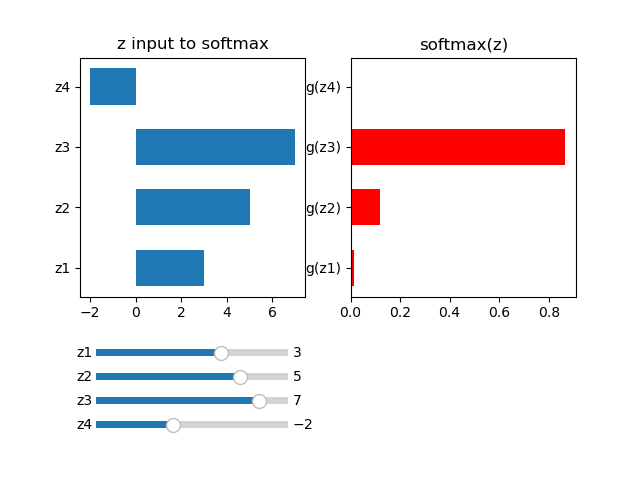

In [5]:
%matplotlib widget

#plot softmax
def plt_softmax(my_softmax):
    fig = plt.figure()
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    gs = GridSpec(3, 2, figure=fig)
    ax0 = fig.add_subplot(gs[0:2, 0])
    ax1 = fig.add_subplot(gs[0:2, 1])
    ax1.set_title("softmax(z)")
    ax0.set_title("z input to softmax")
    
    axs1 = fig.add_axes([0.15, 0.25, 0.30, 0.03])
    axs2 = fig.add_axes([0.15, 0.20, 0.30, 0.03])
    axs3 = fig.add_axes([0.15, 0.15, 0.30, 0.03])
    axs4 = fig.add_axes([0.15, 0.10, 0.30, 0.03])
    
    s1_z1 = Slider(axs1, label="z1", valmin=-10., valmax=10., valinit=3.0, valstep=0.1)
    s2_z2 = Slider(axs2, label="z2", valmin=-10., valmax=10., valinit=5.0, valstep=0.1)
    s3_z3 = Slider(axs3, label="z3", valmin=-10., valmax=10., valinit=7.0, valstep=0.1)
    s4_z4 = Slider(axs4, label="z4", valmin=-10., valmax=10., valinit=-2.0, valstep=0.1)
    
    widths = np.array([s1_z1.val, s2_z2.val, s3_z3.val, s4_z4.val])
    z_labels = np.array(["z1", "z2", "z3", "z4"])
    softmax_widths = my_softmax(widths)
    softmax_labels = np.array(["g(z1)", "g(z2)", "g(z3)", "g(z4)"])
    zbar = ax0.barh(y=z_labels, width=widths, height=0.6, align="center", left=None)
    z_bars = zbar.get_children()
    sbar = ax1.barh(y=softmax_labels, width=softmax_widths, height=0.6, align="center", left=None, color="red")
    s_bars = sbar.get_children()
    
#     @output.capture()
    def update(val):
        z_bars[0].set_width(s1_z1.val)
        z_bars[1].set_width(s2_z2.val)
        z_bars[2].set_width(s3_z3.val)
        z_bars[3].set_width(s4_z4.val)
        a = my_softmax(np.array([s1_z1.val, s2_z2.val, s3_z3.val, s4_z4.val]))
        s_bars[0].set_width(a[0])
        s_bars[1].set_width(a[1])
        s_bars[2].set_width(a[2])
        s_bars[3].set_width(a[3])
        
    s1_z1.on_changed(update)
    s2_z2.on_changed(update)
    s3_z3.on_changed(update)
    s4_z4.on_changed(update)
    
    z1 = np.arange(6.0)
    z2 = np.array([1.0, 7.0, 3.5, 7.0, 4.0, 10.0])
    plt.show()
    
plt_softmax(my_softmax)

    Above, vary the values of the z inputs. Note in particular how the exponential in the numerator magnifies small differences in the values. Note as well that the output values sum to one.
    
#### Neural Networks
    In last weeks assignment, you implemented a neural network to do binary classification. This week you will extend that to multiclass classification. This will utilize the softmax activation.

    4.1 Problem Statement
    In this exercise, you will use a neural network to recognize ten handwritten digits, 0-9. This is a multiclass classification task where one of n choices is selected. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks.

    4.2 Dataset
    You will start by loading the dataset for this task.

    The load_data() function shown below loads the data into variables X and y

    The data set contains 5000 training examples of handwritten digits 

    Each training example is a 20-pixel x 20-pixel grayscale image of the digit.
    
    Each pixel is represented by a floating-point number indicating the grayscale intensity at that location.
    
    The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector.
    
    Each training examples becomes a single row in our data matrix X.
    
    This gives us a 5000 x 400 matrix X where every row is a training example of a handwritten digit image.
    
    The second part of the training set is a 5000 x 1 dimensional vector y that contains labels for the training set
    
    y = 0 if the image is of the digit 0, y = 4 if the image is of the digit 4 and so on.

In [4]:
def load_data():
    X = np.load("./X_mnist.npy")
    y = np.load("./y_mnist.npy")
    return X, y

X, y = load_data()
print(X.shape)
print(y.shape)

(5000, 400)
(5000, 1)


In [5]:
print(X[:2])
print(y[:2])
print(np.unique(y))

[[ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  8.561e-06  1.940e-06 -7.374e-04 -8.134e-03 -1.861e-02
  -1.874e-02 -1.876e-02 -1.910e-02 -1.640e-02 -3.782e-03  3.303e-04
   1.277e-05  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  1.164e-04  1.201e-04 -1

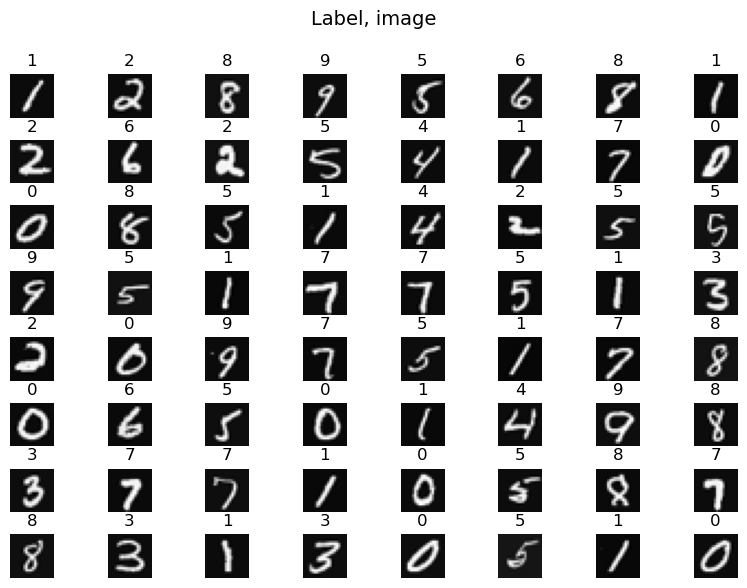

In [6]:
#visualizing the random training data
plt.close("all")
fig, ax = plt.subplots(8, 8, figsize=(8, 6))
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False

m, n = X.shape
for i, ax in enumerate(ax.flat):
    rng = np.random.randint(m)
    X_reshaped = X[rng].reshape((20, 20)).T
    ax.imshow(X_reshaped, cmap="gray")
    ax.set_title(f"{y[rng, 0]}")
    ax.set_axis_off()

fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91])
fig.suptitle("Label, image", fontsize=14)
plt.show()

#### 4.3 Model representation
    The neural network you will use in this assignment can be seen below.

    This has two dense layers with ReLU activations followed by an output layer with a linear activation.
    
    Recall that our inputs are pixel values of digit images.
    Since the images are of size 20 * 20, this gives us 400 inputs

    The parameters have dimensions that are sized for a neural network with 
     25 units in layer 1, 
     15 units in layer 2 and 
     10 output units in layer 3, one for each digit.

    Recall that the dimensions of these parameters is determined as follows:

    If network has S_in units in a layer and S_out units in the next layer, then
         W will be of dimension S_in * S_out.
         b will be a vector with S_out elements
         
    Therefore, the shapes of W, and b, are

            layer1: The shape of W1 is (400, 25) and the shape of b1 is (25,)
            layer2: The shape of W2 is (25, 15) and the shape of b2 is: (15,)
            layer3: The shape of W3 is (15, 10) and the shape of b3 is: (10,)
    
    Note: The bias vector b could be represented as a 1-D (n,) or 2-D (n,1) array. Tensorflow utilizes a 1-D representation and this lab will maintain that convention:

In [10]:
model = Sequential([
    Input(shape=(400,)),
    Dense(units=25, activation="relu", name="L1"),
    Dense(units=15, activation="relu", name="L2"),
    Dense(units=10, activation="linear"),
], name="my_model")
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 dense_3 (Dense)             (None, 10)                160       
                                                                 
Total params: 10575 (41.31 KB)
Trainable params: 10575 (41.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


    In the above code:
    Note that, we defined a loss function, SparseCategoricalCrossentropy and indicates the softmax should be included with the loss calculation by adding from_logits=True)
    defines an optimizer. A popular choice is Adaptive Moment (Adam) which was described in lecture.

In [11]:
[layer1, layer2, layer3] = model.layers
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [12]:
#training where adam is applied with backpropagation to find out best params
history = model.fit(X, y, epochs=40)

Epoch 1/40
157/157 [==============================] - 1s 1ms/step - loss: 1.4095
Epoch 2/40
157/157 [==============================] - 0s 2ms/step - loss: 0.5880
Epoch 3/40
157/157 [==============================] - 0s 2ms/step - loss: 0.4223
Epoch 4/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3499
Epoch 5/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3026
Epoch 6/40
157/157 [==============================] - 0s 1ms/step - loss: 0.2717
Epoch 7/40
157/157 [==============================] - 0s 1ms/step - loss: 0.2497
Epoch 8/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2270
Epoch 9/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2139
Epoch 10/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1988
Epoch 11/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1810
Epoch 12/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1768
Epoch 13/40
157/157 [====

#### Epochs and batches
    
    In the compile statement above, the number of epochs was set to 40. This specifies that the entire data set should be applied during training 100 times. During training, you see output describing the progress of training that looks like this:

        Epoch 1/40
        157/157 [==============================] - 0s 1ms/step - loss: 2.2770

    The first line, Epoch 1/40, describes which epoch the model is currently running. For efficiency, the training data set is broken into 'batches'. The default size of a batch in Tensorflow is 32. There are 5000 examples in our data set or roughly 157 batches. The notation on the 2nd line 157/157 [==== is describing which batch has been executed.

#### Loss (cost)
    In course 1, we learned to track the progress of gradient descent by monitoring the cost. Ideally, the cost will decrease as the number of iterations of the algorithm increases. Tensorflow refers to the cost as loss. Above, you saw the loss displayed each epoch as model.fit was executing. The .fit method returns a variety of metrics including the loss. This is captured in the history variable above. This can be used to examine the loss in a plot as shown below.

{'loss': [1.4094911813735962, 0.588042140007019, 0.4222869575023651, 0.34992027282714844, 0.30258500576019287, 0.2716655731201172, 0.24970607459545135, 0.22703717648983002, 0.21386757493019104, 0.19879551231861115, 0.18104347586631775, 0.17683416604995728, 0.16555573046207428, 0.15497739613056183, 0.14709016680717468, 0.1428820937871933, 0.13163049519062042, 0.124099500477314, 0.11903896182775497, 0.11213552206754684, 0.10887759923934937, 0.10307212173938751, 0.09777362644672394, 0.09312517940998077, 0.09014663100242615, 0.08584093302488327, 0.0815708339214325, 0.07633882761001587, 0.07337193191051483, 0.06925199180841446, 0.06660443544387817, 0.06247863173484802, 0.06134868040680885, 0.05575842782855034, 0.05352197214961052, 0.05148548632860184, 0.04959404096007347, 0.046015527099370956, 0.0449652299284935, 0.04150338098406792]}


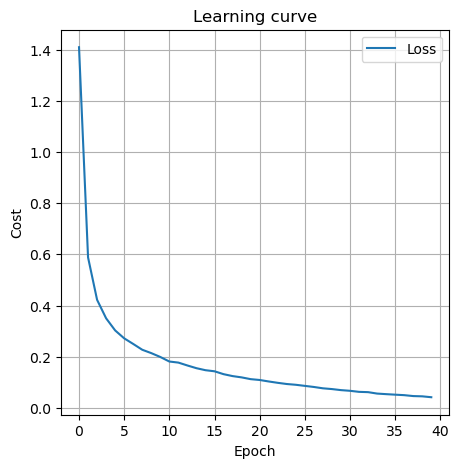

In [21]:
#plot history
print(history.history)

def plot_loss_tf(history):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    ax.plot(history.history["loss"], label="Loss")
    ax.legend()
    ax.grid(True)
    ax.set_title("Learning curve")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Cost")
    plt.show()

plot_loss_tf(history)


In [14]:
#predictions
preds_logits = model.predict(X)
y_preds = np.argmax(preds_logits, axis=1)
print(y_preds)

157/157 [==============================] - 0s 1ms/step
[0 0 0 ... 9 9 9]


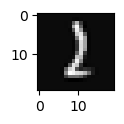

 predicting a Two: 
[[-8.588  2.953  5.735 -0.782 -8.718 -8.198 -5.066  1.514 -3.249 -7.24 ]]
 Largest Prediction index: 2


In [24]:
#single prediction
image_of_two = X[1015] #image of 2 of (1, 400)

def display_digit(image):
    fig, ax = plt.subplots(1, 1, figsize=(1, 1))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    X_random_reshaped = image_of_two.reshape((20,20)).T
    ax.imshow(X_random_reshaped, cmap='gray')
    plt.show()

display_digit(image_of_two)

prediction = model.predict(image_of_two.reshape(1, 400), verbose=0)  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

    The largest output is prediction[2], indicating the predicted digit is a '2'. If the problem only requires a selection, that is sufficient. Use NumPy argmax to select it. If the problem requires a probability, a softmax i.e tf.nn.softmax(ped_logit) is required.

In [25]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[5.587e-07 5.744e-02 9.274e-01 1.372e-03 4.905e-07 8.250e-07 1.891e-05
  1.363e-02 1.164e-04 2.150e-06]]
Total of predictions: 1.000


    To return an integer representing the predicted target, you want the index of the largest probability. This is accomplished with the Numpy argmax function.

In [26]:
yhat = np.argmax(prediction_p)
print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 2


1/1 [==============================] - 0s 24ms/step


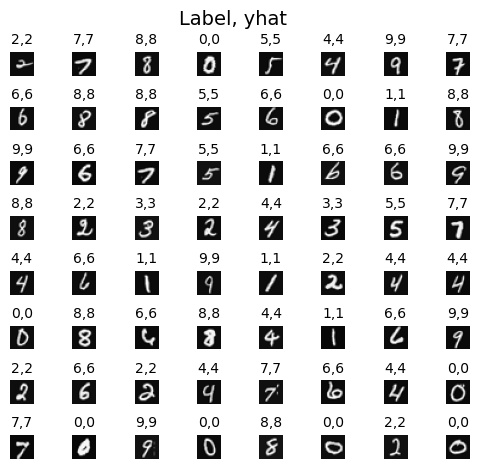

In [27]:
#Let's compare the predictions vs the labels for a random sample of 64 digits. This takes a moment to run.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(5, 5))
fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400), verbose=0)
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
    
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

    Let's look at some of the errors i.e wrong predictions

    Note: increasing the number of training epochs can eliminate the errors on this data set.

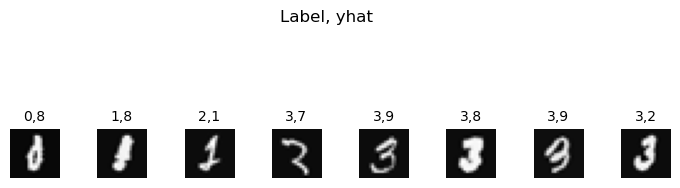

34 errors out of 5000 images


In [48]:
def display_errors(model, X, y):
    
    y_hat_logits = model.predict(X, verbose=0)
    y_hat = np.argmax(y_hat_logits, axis=1)
    not_y_idxs = np.where(y_hat != y[:, 0])[0]
   
    if len(not_y_idxs) == 0:
        print(f"No errors found")
    else:
        cnt = min(8, len(not_y_idxs))
        fig, axes = plt.subplots(1, cnt, figsize=(7, 3))
        fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        
        for i in range(cnt):
            j = not_y_idxs[i]
            X_reshaped = X[j].reshape((20, 20)).T

            # Display the image
            axes[i].imshow(X_reshaped, cmap='gray')

            # Predict using the Neural Network
            prediction = model.predict(X[j].reshape(1, 400), verbose=0)
            prediction_p = tf.nn.softmax(prediction)
            yhat = np.argmax(prediction_p)

            # Display the label above the image
            axes[i].set_title(f"{y[j, 0]},{yhat}",fontsize=10)
            axes[i].set_axis_off()
            fig.suptitle("Label, yhat", fontsize=12)
        plt.show()
    
    return(len(not_y_idxs))

    
    
    
    
print( f"{display_errors(model, X, y)} errors out of {len(X)} images")

In [50]:
#unit tests
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, sigmoid, relu

def test_my_softmax(target):
    z = np.array([1., 2., 3., 4.])
    a = target(z)
    atf = tf.nn.softmax(z)
    
    assert np.allclose(a, atf, atol=1e-10), f"Wrong values. Expected {atf}, got {a}"
    
    z = np.array([np.log(0.1)] * 10)
    a = target(z)
    atf = tf.nn.softmax(z)
    
    assert np.allclose(a, atf, atol=1e-10), f"Wrong values. Expected {atf}, got {a}"
    
    print("\033[92m All tests passed.")
    
def test_model(target, classes, input_size):
    target.build(input_shape=(None, input_size))
    
    assert len(target.layers) == 3, \
        f"Wrong number of layers. Expected 3 but got {len(target.layers)}"
    assert target.input.shape.as_list() == [None, input_size], \
        f"Wrong input shape. Expected [None,  {input_size}] but got {target.input.shape.as_list()}"
    i = 0
    expected = [[Dense, [None, 25], relu],
                [Dense, [None, 15], relu],
                [Dense, [None, classes], linear]]

    for layer in target.layers:
        assert type(layer) == expected[i][0], \
            f"Wrong type in layer {i}. Expected {expected[i][0]} but got {type(layer)}"
        assert layer.output.shape.as_list() == expected[i][1], \
            f"Wrong number of units in layer {i}. Expected {expected[i][1]} but got {layer.output.shape.as_list()}"
        assert layer.activation == expected[i][2], \
            f"Wrong activation in layer {i}. Expected {expected[i][2]} but got {layer.activation}"
        i = i + 1

    print("\033[92mAll tests passed!")
    